In [287]:
# part 1
import copy
# lines = open('inputs/input_11_test.txt','r').read().splitlines()
lines = open('inputs/input_11.txt','r').read().splitlines()

# read the data
G = 7 # number of lines in a group
lines
monkeys = {}
operation = []
operation_num = []
throwto = {}
divisible_test = []
num_monkeys = (len(lines)+1)//7
for m in range(num_monkeys): # loop on monkeys
    # monkeys
    line = lines[G*m + 0]
    
    # items
    line = lines[G*m + 1]
    [_,line] = line.split(':')
    monkeys[m] = [int(x) for x in line.split(',')]

    # operation
    line = lines[G*m + 2].split(' ')
    line2 = lines[G*m + 3].split(' ')
    operation.append(line[-2])
    operation_num.append(line[-1])

    # division test
    line = lines[G*m + 3]  # divisible test
    line = line.split(' ')
    divisible_test.append(int(line[-1]))

    # throw to
    line = lines[G*m + 4].split(' ')
    line2 = lines[G*m + 5].split(' ')
    throwto[m] = (int(line[-1]), int(line2[-1]))

print(f'monkeys worry list = {monkeys}')
print(f'operation = {operation}')
print(f'operation_num = {operation_num}')
print(f'divisible_test = {divisible_test}')
print(f'throwto (if: true,false) = {throwto}')
monkey_start = copy.deepcopy(monkeys)  # use this to initialize part 2

# process the data, monkeys throw items
inspected = [0]*num_monkeys
for r in range(20): # rounds
    for m in range(num_monkeys): # monkeys
        for item in monkeys[m]: # items to be throw
            # print(item)

            # operation
            if operation_num[m].isnumeric():
                x = int(operation_num[m])
            else:
                x = item
            if operation[m] == '+':
                newitem = item + x
            elif operation[m] == '*':
                newitem = item * x

            # divide by 3
            newitem = newitem // 3

            # test
            if newitem % divisible_test[m] == 0:
                monkeys[throwto[m][0]].append(newitem)
            else:
                monkeys[throwto[m][1]].append(newitem)
            inspected[m] += 1 # log up that monkey inspected and threw an item
        monkeys[m] = [] # remove this monkey's list
    # print(f'monkeys = {monkeys}, inspections = {inspected}')
# print(monkeys)
print(f'number of inspected items = {inspected}')

inspected.sort(reverse=True)
print(f'sorted inspection list = {inspected}')
print(f'monkey business = {inspected[0]*inspected[1]}')



monkeys worry list = {0: [84, 66, 62, 69, 88, 91, 91], 1: [98, 50, 76, 99], 2: [72, 56, 94], 3: [55, 88, 90, 77, 60, 67], 4: [69, 72, 63, 60, 72, 52, 63, 78], 5: [89, 73], 6: [78, 68, 98, 88, 66], 7: [70]}
operation = ['*', '*', '+', '+', '*', '+', '+', '+']
operation_num = ['11', 'old', '1', '2', '13', '5', '6', '7']
divisible_test = [2, 7, 13, 3, 19, 17, 11, 5]
throwto (if: true,false) = {0: (4, 7), 1: (3, 6), 2: (4, 0), 3: (6, 5), 4: (1, 7), 5: (2, 0), 6: (2, 5), 7: (1, 3)}
number of inspected items = [312, 34, 9, 295, 167, 320, 70, 311]
sorted inspection list = [320, 312, 311, 295, 167, 70, 34, 9]
monkey business = 99840


In [289]:
# part 2 (continued)
import numpy as np
monkeys = copy.deepcopy(monkey_start)
print(monkeys)
ROUNDS = 10000
# processing
# process the data, monkeys throw items

prod_divisible_test_array = (np.array(divisible_test)).prod()

inspected = [0]*num_monkeys
inspected_array = np.zeros((ROUNDS,num_monkeys))
for r in range(ROUNDS): # rounds
    for m in range(num_monkeys): # monkeys
        for item in monkeys[m]: # items to be throw
            # print(item)

            # operation
            if operation_num[m].isnumeric():
                x = int(operation_num[m])
            else:
                x = item
            if operation[m] == '+':
                newitem = item + x
            elif operation[m] == '*':
                newitem = item * x

            # divide by 3
            newitem = newitem % prod_divisible_test_array

            # test
            if newitem % divisible_test[m] == 0:
                monkeys[throwto[m][0]].append(newitem)
            else:
                monkeys[throwto[m][1]].append(newitem)
            inspected[m] += 1 # log up that monkey inspected and threw an item

        monkeys[m] = [] # remove this monkey's list
    inspected_array[r,:] = np.array(inspected)
    if (r+1) % 1000 == 0:
        print(f'round: {r+1}, inspected = {inspected}, sum/rounds = {sum(inspected)/(r+1)}') #, monkeys = {monkeys}')
# print(monkeys)
print(f'number of inspected items = {inspected}')

inspected.sort(reverse=True)
print(f'sorted inspection list = {inspected}')
print(f'monkey business = {inspected[0]*inspected[1]}')

{0: [84, 66, 62, 69, 88, 91, 91], 1: [98, 50, 76, 99], 2: [72, 56, 94], 3: [55, 88, 90, 77, 60, 67], 4: [69, 72, 63, 60, 72, 52, 63, 78], 5: [89, 73], 6: [78, 68, 98, 88, 66], 7: [70]}
round: 1000, inspected = [14399, 1929, 2654, 12646, 5440, 12847, 6091, 14203], sum/rounds = 70.209
round: 2000, inspected = [28912, 4059, 5350, 25198, 10283, 25647, 12082, 28473], sum/rounds = 70.002
round: 3000, inspected = [43427, 6184, 8040, 37753, 15122, 38445, 18079, 42742], sum/rounds = 69.93066666666667
round: 4000, inspected = [57937, 8312, 10730, 50305, 19935, 51241, 24083, 57010], sum/rounds = 69.88825
round: 5000, inspected = [72452, 10435, 13416, 62868, 24770, 64045, 30078, 71279], sum/rounds = 69.8686
round: 6000, inspected = [86964, 12558, 16106, 75420, 29592, 76849, 36072, 85547], sum/rounds = 69.85133333333333
round: 7000, inspected = [101474, 14686, 18797, 87977, 34414, 89650, 42070, 99811], sum/rounds = 69.83985714285714
round: 8000, inspected = [115992, 16812, 21486, 100533, 39243, 102

10000
p = [ 14.45495204 -77.83016345], yfit = 28832.073919612736
p = [   2.03458982 -136.26887073], yfit = 3932.910765881757
p = [ 2.65134084 -8.71442228], yfit = 5293.967251834959
p = [12.5926364  61.05381703], yfit = 25246.32660945355
p = [  5.10928728 442.1500518 ], yfit = 10660.724603392417
p = [12.8330527  23.16378885], yfit = 25689.26919470147
p = [ 6.06065442 54.38079688], yfit = 12175.689633850838
p = [ 14.20682827 -25.42588195], yfit = 28388.230655983305


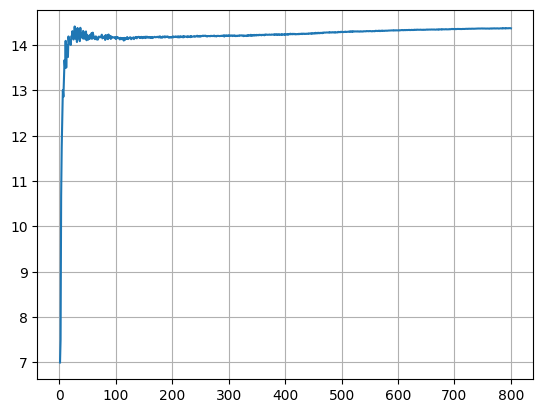

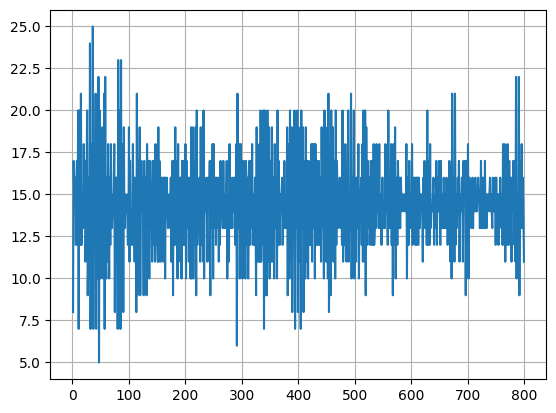

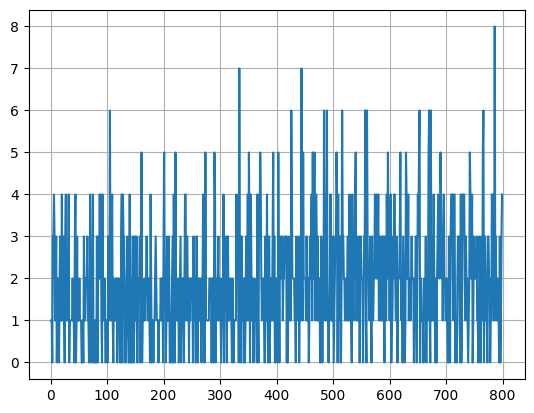

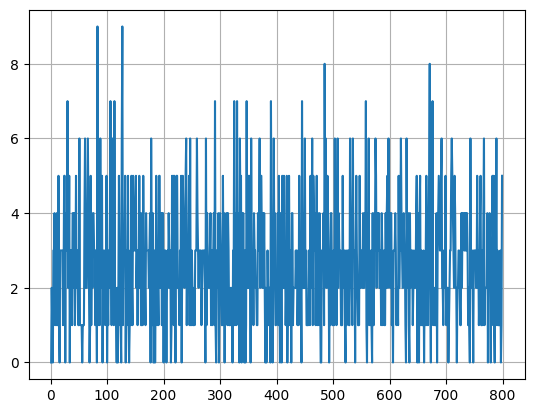

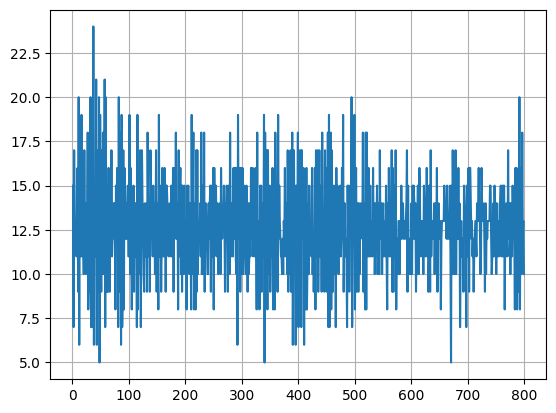

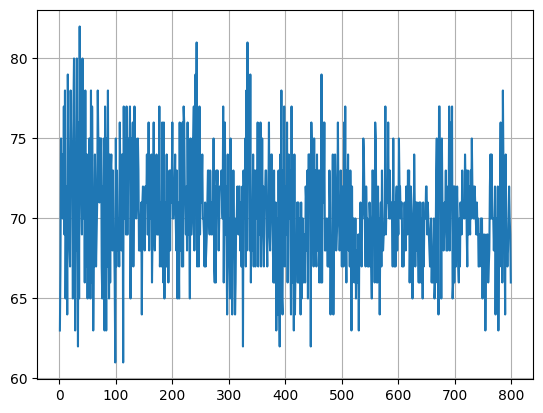

In [283]:
# unneeded plots:
y = inspected_array
print(len(y[:,0]))
import matplotlib.pyplot as plt
STOP = 800
n = [x for x in range(1,STOP+1)]

plt.figure(1)
plt.plot(n[0:800], y[:800,0]/n[0:800])
plt.grid()

diffy = np.diff(y[:,0])
plt.figure(2)
plt.plot(n[0:STOP-1], diffy[0:STOP-1])
plt.grid('visible=on')

diffy = np.diff(y[:,1])
plt.figure(3)
plt.plot(n[0:STOP-1], diffy[0:STOP-1])
plt.grid('visible=on')

diffy = np.diff(y[:,2])
plt.figure(4)
plt.plot(n[0:STOP-1], diffy[0:STOP-1])
plt.grid('visible=on')

diffy = np.diff(y[:,3])
plt.figure(5)
plt.plot(n[0:STOP-1], diffy[0:STOP-1])
plt.grid('visible=on')

sumy = np.sum(y,axis=1)
diffy = np.diff(sumy)
plt.figure(6)
plt.plot(n[0:STOP-1], diffy[0:STOP-1])
plt.grid('visible=on')

polyorder = 1
p = np.zeros((num_monkeys,polyorder+1))
for m in range(num_monkeys):
    p[m,:] = np.polyfit(n[200:800], y[200:800,m], polyorder)
    yfit = np.polyval(p[m,:],2000)
    print(f'p = {p[m,:]}, yfit = {yfit}')


In [275]:

prod_divisible_test_array = (np.array(divisible_test)).prod()
print(prod_divisible_test_array)

9699690
